In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [3]:
df = pd.read_csv("Checkpoint2.csv",low_memory=False)

In [4]:
y_train = df[df['Semestre Historico'] <20181]['Aprovado']
X_train = df[df['Semestre Historico'] <20181][['Sexo', 'Pontos Vestib','Pontos SISU', 'Idade Vest','Carga Horaria',
       'Categoria de Ingresso', 'Horas Aula', 'TipoCurriculo','vez','Cont Disc','IAA -1','FI',
        'Aprov Disc', 'Aprov Aluno','Aprov Prof',"Aprov -3","Aprov -1", 'IAA Sem', 'IAA Hist Sem',
        'Etnia_branca', 'Etnia_indígena','Etnia_parda', 'Etnia_preta']]

y_test = df[df['Semestre Historico'] == 20181]['Aprovado']
X_test = df[df['Semestre Historico'] == 20181][['Sexo', 'Pontos Vestib','Pontos SISU', 'Idade Vest','Carga Horaria',
       'Categoria de Ingresso', 'Horas Aula', 'TipoCurriculo','vez','Cont Disc','IAA -1','FI',
        'Aprov Disc', 'Aprov Aluno','Aprov Prof',"Aprov -3","Aprov -1", 'IAA Sem', 'IAA Hist Sem',
        'Etnia_branca', 'Etnia_indígena','Etnia_parda', 'Etnia_preta']]

In [15]:
df.head()

,Unnamed: 0,Semestre Historico,Sexo,Idade Vest,Categoria de Ingresso,Nota,Horas Aula,Frequencia,TipoCurriculo,Pontos SISU,...,Aprov -3,Aprov -1,IAA Sem,IAA Hist Sem,FI,IAA -1,Etnia_branca,Etnia_indígena,Etnia_parda,Etnia_preta
0,610049,20152,1,0.034884,1,0.0,0.048679,1,1,0.0,...,0.846154,0.833333,0.671739,0.656858,0.0,-0.215942,0,0,0,1
1,898382,20001,0,0.069767,0,0.0,0.123783,1,1,0.0,...,0.941176,1.000000,0.720000,0.710211,0.0,0.000000,1,0,0,0
2,509879,20131,0,0.034884,1,0.0,0.098748,1,1,0.0,...,0.266667,0.000000,0.000000,0.417708,1.0,0.000000,0,0,1,0
3,110761,20031,0,0.034884,0,0.0,0.098748,1,1,0.0,...,1.000000,1.000000,0.753704,0.783654,0.0,-0.622963,1,0,0,0
4,509880,20092,0,0.069767,0,0.0,0.098748,1,1,0.0,...,0.941176,1.000000,0.720000,0.710211,0.0,0.000000,1,0,0,0


In [12]:
x = round(X_train.corr(),2)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

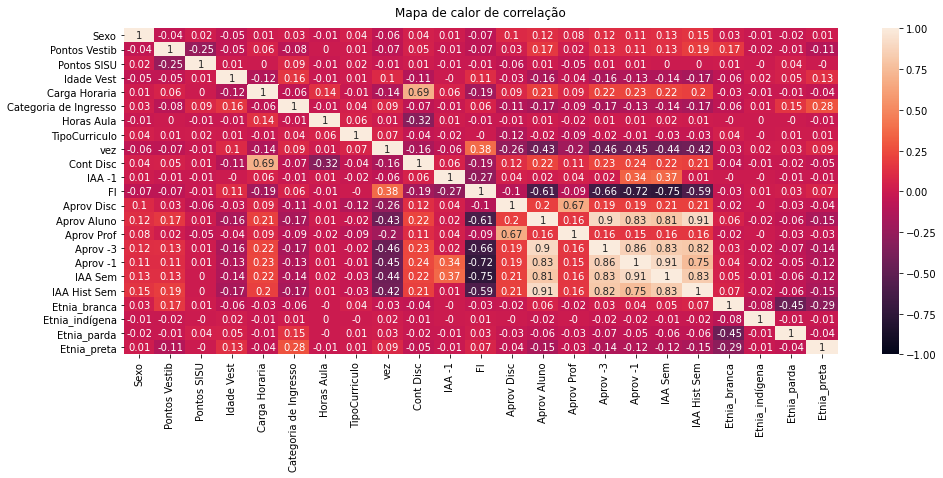

In [13]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(x, vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Mapa de calor de correlação', fontdict={'fontsize':12}, pad=12);

In [5]:
def average_precision_score(y_true, y_score, k=10):
    unique_y = np.unique(y_true)

    if len(unique_y) > 2:
        raise ValueError("Only supported for two relevance levels.")

    pos_label = unique_y[1]
    n_pos = np.sum(y_true == pos_label)

    order = np.argsort(y_score)[::-1][:min(n_pos, k)]
    y_true = np.asarray(y_true)[order]

    score = 0
    for i in range(len(y_true)):
        if y_true[i] == pos_label:
            # Compute precision up to document i
            # i.e, percentage of relevant documents up to document i.
            prec = 0
            for j in range(0, i + 1):
                if y_true[j] == pos_label:
                    prec += 1.0
            prec /= (i + 1.0)
            score += prec

    if n_pos == 0:
        return 0

    return score / n_pos

my_scorer = make_scorer(average_precision_score,needs_proba=True, greater_is_better=True)

In [66]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': ['auto'],
    'min_samples_leaf': [5],
    'min_samples_split': [5,8,10],
    'n_estimators': [100]
}
# Create a based model
rf = RandomForestClassifier(n_jobs=-1)
#my_scorer = make_scorer(evaluate, greater_is_better=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,scoring=my_scorer, param_grid = param_grid, cv = 2, verbose = 2)

In [69]:
def average_precision_score(y_true, y_score, k=500):
    unique_y = np.unique(y_true)

    if len(unique_y) > 2:
        raise ValueError("Only supported for two relevance levels.")

    pos_label = unique_y[1]
    n_pos = np.sum(y_true == pos_label)

    order = np.argsort(y_score)[::-1][:min(n_pos, k)]
    y_true = np.asarray(y_true)[order]

    score = 0
    for i in range(len(y_true)):
        if y_true[i] == pos_label:
            # Compute precision up to document i
            # i.e, percentage of relevant documents up to document i.
            prec = 0
            for j in range(0, i + 1):
                if y_true[j] == pos_label:
                    prec += 1.0
            prec /= (i + 1.0)
            score += prec

    if n_pos == 0:
        return 0

    return score / n_pos

my_scorer = make_scorer(average_precision_score,needs_proba=True, greater_is_better=True)

In [71]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30],
    'max_features': ['auto'],
    'min_samples_leaf': [3],
    'min_samples_split': [10],
    'n_estimators': [200,500]
}
# Create a based model
rf = RandomForestClassifier(n_jobs=-1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,scoring=my_scorer, param_grid = param_grid, cv = 2, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total= 1.7min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total= 1.9min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500, total= 4.0min
[CV] bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500, total= 4.6min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 12.3min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [6]:
model = RandomForestClassifier(n_estimators=500,min_samples_split = 10,min_samples_leaf = 3,
                               max_features='auto',max_depth = 30, bootstrap= True)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=500)

In [14]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.3)
pred = predicted[:,1]

conf_mat = confusion_matrix(y_test,pred)
print(conf_mat)

[[17375  2969]
 [ 1274  4697]]


In [15]:
feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: vez                  Importance: 0.21
Variable: IAA Hist Sem         Importance: 0.12
Variable: IAA Sem              Importance: 0.1
Variable: Aprov Disc           Importance: 0.09
Variable: Aprov Aluno          Importance: 0.07
Variable: Aprov -3             Importance: 0.07
Variable: Aprov Prof           Importance: 0.06
Variable: Pontos Vestib        Importance: 0.05
Variable: Aprov -1             Importance: 0.05
Variable: IAA -1               Importance: 0.04
Variable: Carga Horaria        Importance: 0.03
Variable: FI                   Importance: 0.03
Variable: Idade Vest           Importance: 0.02
Variable: Horas Aula           Importance: 0.02
Variable: Cont Disc            Importance: 0.02
Variable: Categoria de Ingresso Importance: 0.01
Variable: Etnia_branca         Importance: 0.01
Variable: Sexo                 Importance: 0.0
Variable: Pontos SISU          Importance: 0.0
Variable: TipoCurriculo        Importance: 0.0
Variable: Etnia_indígena       Importance: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(0.0, 0.5)

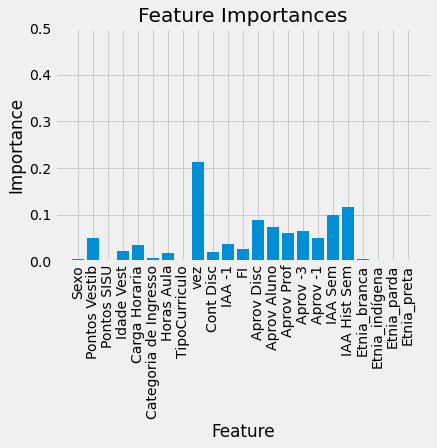

In [17]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');
plt.ylim(0,0.5)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20344
           1       0.23      1.00      0.37      5971

    accuracy                           0.23     26315
   macro avg       0.11      0.50      0.18     26315
weighted avg       0.05      0.23      0.08     26315

0.1               precision    recall  f1-score   support

           0       0.97      0.61      0.75     20344
           1       0.41      0.94      0.57      5971

    accuracy                           0.68     26315
   macro avg       0.69      0.77      0.66     26315
weighted avg       0.85      0.68      0.71     26315

0.2               precision    recall  f1-score   support

           0       0.95      0.77      0.85     20344
           1       0.52      0.86      0.65      5971

    accuracy                           0.79     26315
   macro avg       0.74      0.82      0.75     26315
weighted avg       0.85      0.79      0.80     26315

0.3      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Precision')

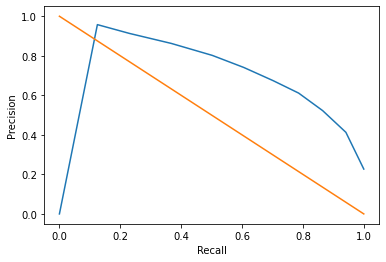

In [77]:
prec = []
rec = []
lis = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lis:
    predicted = model.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(y_test, y_pred2))
    preci = precision_score(y_test, y_pred2)
    prec.append(preci)
    reci = recall_score(y_test, y_pred2)
    rec.append(reci)
    
x_ideal = [0,1]
y_ideal = [1,0]
plt.plot(rec, prec)  
plt.plot(x_ideal,y_ideal)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [94]:
average_precision_score(np.array(y_test)[:500], y_pred2[:500], k=500)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [102]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.5).astype(int)
y_pred2 = predicted[:,1]
print(i,classification_report(np.array(y_test)[:500], y_pred2[:500]))

1               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.75      0.86       500

    accuracy                           0.75       500
   macro avg       0.50      0.38      0.43       500
weighted avg       1.00      0.75      0.86       500



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.7).astype(int)
y_pred2 = predicted[:,1]
print(i,classification_report(np.array(y_test)[:500], y_pred2[:500]))

1               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.56      0.72       500

    accuracy                           0.56       500
   macro avg       0.50      0.28      0.36       500
weighted avg       1.00      0.56      0.72       500



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
predicted = model.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.3).astype(int)
y_pred2 = predicted[:,1]
print(i,classification_report(np.array(y_test)[:500], y_pred2[:500]))

1               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.87      0.93       500

    accuracy                           0.87       500
   macro avg       0.50      0.43      0.47       500
weighted avg       1.00      0.87      0.93       500



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
x = classification_report(y_test,y_pred2)
x

'              precision    recall  f1-score   support\n\n           0       0.84      0.98      0.91     20344\n           1       0.86      0.37      0.52      5971\n\n    accuracy                           0.84     26315\n   macro avg       0.85      0.68      0.71     26315\nweighted avg       0.85      0.84      0.82     26315\n'

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0               precision    recall  f1-score   support

           0       0.00      0.00      0.00     20344
           1       0.23      1.00      0.37      5971

    accuracy                           0.23     26315
   macro avg       0.11      0.50      0.18     26315
weighted avg       0.05      0.23      0.08     26315

0.1               precision    recall  f1-score   support

           0       0.97      0.61      0.75     20344
           1       0.41      0.94      0.57      5971

    accuracy                           0.68     26315
   macro avg       0.69      0.77      0.66     26315
weighted avg       0.85      0.68      0.71     26315

0.2               precision    recall  f1-score   support

           0       0.95      0.77      0.85     20344
           1       0.52      0.86      0.65      5971

    accuracy                           0.79     26315
   macro avg       0.74      0.82      0.75     26315
weighted avg       0.85      0.79      0.80     26315

0.3      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Precision')

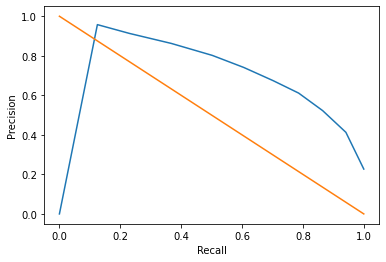

In [105]:
prec = []
rec = []
lis = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lis:
    predicted = model.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(y_test, y_pred2))
    preci = precision_score(y_test, y_pred2)
    prec.append(preci)
    reci = recall_score(y_test, y_pred2)
    rec.append(reci)
    
x_ideal = [0,1]
y_ideal = [1,0]
plt.plot(rec, prec)  
plt.plot(x_ideal,y_ideal)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [123]:
np.array([0.3,0.8] >= 0.5).astype(int)

TypeError: '>=' not supported between instances of 'list' and 'float'

In [124]:
y_pred2

array([1., 0., 0., ..., 0., 0., 0.])

In [142]:
lis = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in lis:
    predicted = model.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(np.array(y_test)[:500], y_pred2[:500]))

    row_occurrences = np.count_nonzero(y_pred2[:500] == 1)
    print(row_occurrences)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.96      0.98       500

    accuracy                           0.96       500
   macro avg       0.50      0.48      0.49       500
weighted avg       1.00      0.96      0.98       500

478


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.2               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.91      0.95       500

    accuracy                           0.91       500
   macro avg       0.50      0.45      0.48       500
weighted avg       1.00      0.91      0.95       500

453


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.87      0.93       500

    accuracy                           0.87       500
   macro avg       0.50      0.43      0.47       500
weighted avg       1.00      0.87      0.93       500

435


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.82      0.90       500

    accuracy                           0.82       500
   macro avg       0.50      0.41      0.45       500
weighted avg       1.00      0.82      0.90       500

411


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.75      0.86       500

    accuracy                           0.75       500
   macro avg       0.50      0.38      0.43       500
weighted avg       1.00      0.75      0.86       500

375


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.68      0.81       500

    accuracy                           0.68       500
   macro avg       0.50      0.34      0.40       500
weighted avg       1.00      0.68      0.81       500

339


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.56      0.72       500

    accuracy                           0.56       500
   macro avg       0.50      0.28      0.36       500
weighted avg       1.00      0.56      0.72       500

281


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.42      0.59       500

    accuracy                           0.42       500
   macro avg       0.50      0.21      0.29       500
weighted avg       1.00      0.42      0.59       500

208
0.9               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.23      0.38       500

    accuracy                           0.23       500
   macro avg       0.50      0.12      0.19       500
weighted avg       1.00      0.23      0.38       500

117


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
precisions = [478/500,453/500,435/500, 411/500, 375/500, 339/500, 281/500,208/500,117/500]
print(lis,precisions)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] [0.956, 0.906, 0.87, 0.822, 0.75, 0.678, 0.562, 0.416, 0.234]


In [125]:
predicted = model.predict_proba(X_test)
predicted

array([[0.28649751, 0.71350249],
       [0.80724643, 0.19275357],
       [0.71038301, 0.28961699],
       ...,
       [0.86234807, 0.13765193],
       [0.86313524, 0.13686476],
       [0.40874626, 0.59125374]])

# Árvore de Decisão

In [30]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [ ]:
clas = tree.DecisionTreeClassifier(random_state = 42,max_depth=10)  
clas.fit(X_train, y_train)

#feature_list = list(X_train.columns)

viz = dtreeviz(clas, X_train, np.array(y_train),feature_names=X_train.columns,
               target_name='Aprovação',
                class_names=["Reprovado", "Aprovado"])
viz

# Regressão Logística

In [ ]:
from sklearn.model import LogisticRegression

In [ ]:

logisticRegr = LogisticRegression(max_iter=10000)

In [ ]:
logisticRegr.fit(X_train, y_train)

In [14]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'max_iter': [1000,10000,15000,20000]
}
# Create a based model
logisticRegr = LogisticRegression(max_iter=10000,n_jobs=-1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = logisticRegr,scoring=my_scorer, param_grid = param_grid, cv = 2, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 28 candidates, totalling 56 fits
[CV] C=0.001, max_iter=1000 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.001, max_iter=1000, total=  14.3s
[CV] C=0.001, max_iter=1000 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV] ........................... C=0.001, max_iter=1000, total=  13.6s
[CV] C=0.001, max_iter=10000 .........................................
[CV] .......................... C=0.001, max_iter=10000, total=  13.6s
[CV] C=0.001, max_iter=10000 .........................................
[CV] .......................... C=0.001, max_iter=10000, total=  13.6s
[CV] C=0.001, max_iter=15000 .........................................
[CV] .......................... C=0.001, max_iter=15000, total=  13.5s
[CV] C=0.001, max_iter=15000 .........................................
[CV] .......................... C=0.001, max_iter=15000, total=  13.6s
[CV] C=0.001, max_iter=20000 .........................................
[CV] .......................... C=0.001, max_iter=20000, total=  13.8s
[CV] C=0.001, max_iter=20000 .........................................
[CV] .......................... C=0.001, max_iter=20000, total=  13.5s
[CV] C=0.01, max_iter=1000 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed: 31.7min finished


{'C': 0.001, 'max_iter': 1000}

In [13]:
def average_precision_score(y_true, y_score, k=500):
    unique_y = np.unique(y_true)

    if len(unique_y) > 2:
        raise ValueError("Only supported for two relevance levels.")

    pos_label = unique_y[1]
    n_pos = np.sum(y_true == pos_label)

    order = np.argsort(y_score)[::-1][:min(n_pos, k)]
    y_true = np.asarray(y_true)[order]

    score = 0
    for i in range(len(y_true)):
        if y_true[i] == pos_label:
            # Compute precision up to document i
            # i.e, percentage of relevant documents up to document i.
            prec = 0
            for j in range(0, i + 1):
                if y_true[j] == pos_label:
                    prec += 1.0
            prec /= (i + 1.0)
            score += prec

    if n_pos == 0:
        return 0

    return score / n_pos

my_scorer = make_scorer(average_precision_score,needs_proba=True, greater_is_better=True)

In [6]:
logisticRegr = LogisticRegression(max_iter=10000,C = 0.001,n_jobs=-1)
logisticRegr.fit(X_train,y_train)


LogisticRegression(C=0.001, max_iter=10000, n_jobs=-1)

0.1               precision    recall  f1-score   support

           0       0.98      0.51      0.67     20344
           1       0.36      0.96      0.53      5971

    accuracy                           0.61     26315
   macro avg       0.67      0.73      0.60     26315
weighted avg       0.84      0.61      0.64     26315

0.2               precision    recall  f1-score   support

           0       0.93      0.80      0.86     20344
           1       0.54      0.81      0.65      5971

    accuracy                           0.80     26315
   macro avg       0.74      0.80      0.75     26315
weighted avg       0.84      0.80      0.81     26315

0.3               precision    recall  f1-score   support

           0       0.91      0.89      0.90     20344
           1       0.65      0.69      0.67      5971

    accuracy                           0.85     26315
   macro avg       0.78      0.79      0.78     26315
weighted avg       0.85      0.85      0.85     26315

0.4    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Precision')

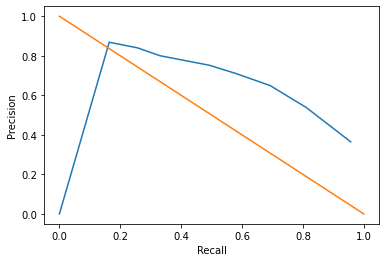

In [20]:
prec = []
rec = []
lis = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for i in lis:
    predicted = logisticRegr.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(y_test, y_pred2))
    preci = precision_score(y_test, y_pred2)
    prec.append(preci)
    reci = recall_score(y_test, y_pred2)
    rec.append(reci)
    
x_ideal = [0,1]
y_ideal = [1,0]
plt.plot(rec, prec)  
plt.plot(x_ideal,y_ideal)
plt.xlabel("Recall")
plt.ylabel("Precision")

In [22]:
lis = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in lis:
    predicted = logisticRegr.predict_proba(X_test)
    predicted[:,1] = (predicted[:,1] >= i).astype(int)
    y_pred2 = predicted[:,1]
    print(i,classification_report(np.array(y_test)[:500], y_pred2[:500]))

    row_occurrences = np.count_nonzero(y_pred2[:500] == 1)
    print(row_occurrences)

0.1               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.95      0.98       500

    accuracy                           0.95       500
   macro avg       0.50      0.48      0.49       500
weighted avg       1.00      0.95      0.98       500

477
0.2               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.86      0.93       500

    accuracy                           0.86       500
   macro avg       0.50      0.43      0.46       500
weighted avg       1.00      0.86      0.93       500

431
0.3               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.80      0.89       500

    accuracy                           0.80       500
   macro avg       0.50      0.40      0.44       500
weighted avg       1.00      0.80      0.89       500


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMe

In [9]:
predicted = logisticRegr.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.3)
pred = predicted[:,1]

conf_mat = confusion_matrix(y_test,pred)
print(conf_mat)

[[18109  2235]
 [ 1836  4135]]


In [10]:
predicted = logisticRegr.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.7)
pred = predicted[:,1]

conf_mat = confusion_matrix(y_test,pred)
print(conf_mat)

[[19852   492]
 [ 3999  1972]]


In [11]:
predicted = logisticRegr.predict_proba(X_test)
predicted[:,1] = (predicted[:,1] >= 0.5)
pred = predicted[:,1]

conf_mat = confusion_matrix(y_test,pred)
print(conf_mat)

[[19375   969]
 [ 3030  2941]]


In [7]:
feature_list = list(X_train.columns)

# Get numerical feature importances
importances = list(logisticRegr.coef_[0])

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: vez                  Importance: 1.06
Variable: FI                   Importance: 0.52
Variable: Idade Vest           Importance: 0.34
Variable: Categoria de Ingresso Importance: 0.31
Variable: Aprov -1             Importance: 0.25
Variable: Etnia_preta          Importance: 0.2
Variable: Etnia_parda          Importance: 0.1
Variable: TipoCurriculo        Importance: 0.08
Variable: Pontos SISU          Importance: 0.04
Variable: IAA -1               Importance: 0.03
Variable: Etnia_indígena       Importance: 0.01
Variable: Horas Aula           Importance: -0.04
Variable: Etnia_branca         Importance: -0.1
Variable: Sexo                 Importance: -0.2
Variable: Pontos Vestib        Importance: -0.38
Variable: Aprov Aluno          Importance: -0.44
Variable: Carga Horaria        Importance: -0.57
Variable: Aprov -3             Importance: -0.6
Variable: Cont Disc            Importance: -0.69
Variable: Aprov Prof           Importance: -1.45
Variable: IAA Sem              Impo

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(-2.2, 1.2)

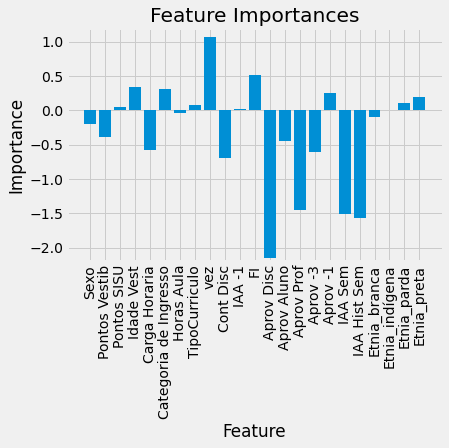

In [14]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');
plt.ylim(-2.2,1.2)

Feature: 0, Score: -0.19813
Feature: 1, Score: -0.38281
Feature: 2, Score: 0.04481
Feature: 3, Score: 0.33716
Feature: 4, Score: -0.57240
Feature: 5, Score: 0.30570
Feature: 6, Score: -0.03537
Feature: 7, Score: 0.08271
Feature: 8, Score: 1.06237
Feature: 9, Score: -0.69260
Feature: 10, Score: 0.02504
Feature: 11, Score: 0.51893
Feature: 12, Score: -2.15096
Feature: 13, Score: -0.44318
Feature: 14, Score: -1.45405
Feature: 15, Score: -0.60478
Feature: 16, Score: 0.25411
Feature: 17, Score: -1.50699
Feature: 18, Score: -1.57406
Feature: 19, Score: -0.09772
Feature: 20, Score: 0.00544
Feature: 21, Score: 0.10251
Feature: 22, Score: 0.19972


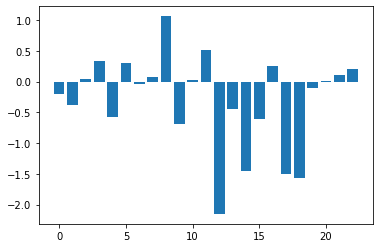

In [23]:
from matplotlib import pyplot
# get importance
importance = logisticRegr.coef_[0]
logisticRegr.get_params
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

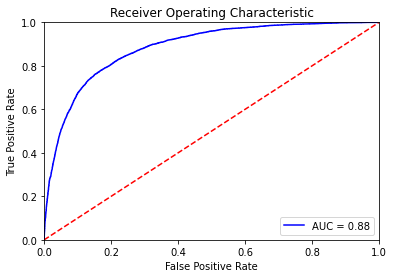

ModuleNotFoundError: No module named 'ggplot'

In [25]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logisticRegr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df_plot = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df_plot, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

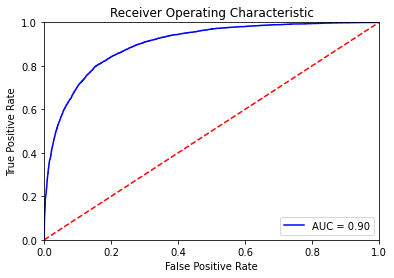

ModuleNotFoundError: No module named 'ggplot'

In [8]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# method II: ggplot
from ggplot import *
df_plot = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df_plot, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')